# Imports

In [148]:
import numpy as np      # 배열
import pandas as pd     # 데이터 프레임
import matplotlib.pyplot as plt # 그래프
import seaborn as sns           # 그래프

from sklearn import datasets # 데이테 셋. load 함수들을 사용하기 위해서 사용
from sklearn.model_selection import train_test_split # 훈련 / 테스트 셋 분리 함수

# 훈련
from sklearn.neighbors import KNeighborsClassifier # KNN 알고리즘을 사용한 분류기

# 평가
from sklearn.metrics import confusion_matrix, accuracy_score # cm =  , ac = 정확도를 계산해주는 함수

# 분류
from sklearn.linear_model import LogisticRegression # 확률을 계산해주는 함수

# Python에서 이미지 다루기

* 이미지 == 배열

In [78]:
china = datasets.load_sample_image('china.jpg')
# 이미지 파일을 읽어서, 이미지를 numpy.ndarray로 변환

In [79]:
type(china)
china.shape #(이미지의 세로 길이, 이미지의 가로 길이, RGB(3)/ RGBA(alpha. 4))

(427, 640, 3)

* 흑백 이미지인 경우, 이미지 배열의 모양(shape): (height, width)
* 컬러 이미지인 경우,
    * 불투명 이미지(jpg)의 배열 모양 : (height, width, 3)
    * 투명도가 있는 이미지(png)의 배열 모양 : (height, width, 4)
* 이미지 배열의 숫자 스케일
    * 0~ 255 정수 스케일 - 정수 3d/ 2d array
    * 0.0 ~ 1.0 실수 스케일 - 실수 3d/ 2d array

<function matplotlib.pyplot.show(*args, **kw)>

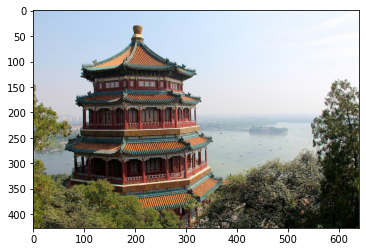

In [80]:
plt.imshow(china)

plt.show

In [81]:
china[:,:,0] # RGB 중에서 r의 크기만 가지고 있는 배열

array([[174, 174, 174, ..., 250, 250, 250],
       [172, 173, 173, ..., 251, 251, 251],
       [174, 174, 174, ..., 252, 252, 252],
       ...,
       [ 88, 147, 122, ...,  39,   8,   6],
       [122, 129, 118, ...,   9,   9,  16],
       [116, 104, 108, ...,  43,  13,  15]], dtype=uint8)

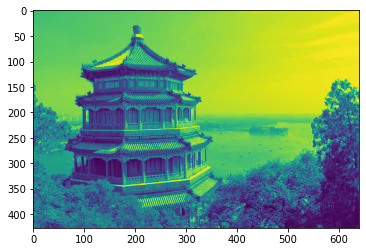

In [82]:
plt.imshow(china[:,:,0])

plt.show()

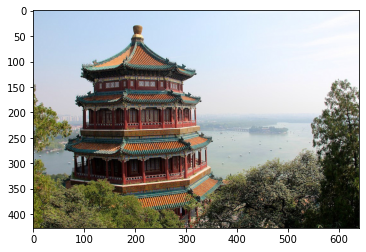

In [83]:
china_scaled = china / 255
plt.imshow(china_scaled)

plt.show()

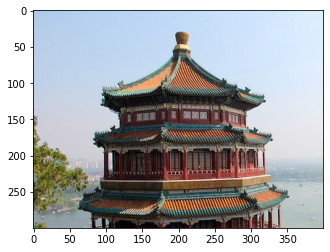

In [84]:
# 이미지 자르기 - ndarray slicing

china_cut = china[:300, :400, :]

plt.imshow(china_cut)

plt.show()

In [85]:
# pyplot.imsave(파일이름, 이미지배열): 이미지(숫자) 배열을 파일에 저장
plt.imsave('china_cut.jpg', china_cut)

In [86]:
# pyplot.imread(파일이름) : 이미지 파일(jpg)을 읽어서 numpy.ndarray (숫자 배열)을 리턴
imgdata = plt.imread('china_cut.jpg')

In [87]:
print(type(imgdata))
print(imgdata.shape)

<class 'numpy.ndarray'>
(300, 400, 3)


# MNIST 데이터셋

70,000개의 숫자(0~9) 손글씨 흑백 이미지(28 x 28)가 numpy.ndarray(숫자배열)로 저장된 데이터 셋.

In [88]:
mnist = datasets.fetch_openml('mnist_784') # 784 pixel의 데이터 

In [89]:
type(mnist) #>: Bunch: Pythin의 dict(key-value)와 비슷한 타입

sklearn.utils.Bunch

In [90]:
mnist.keys() # dict의 key들만 return

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [91]:
X = mnist['data'].values.copy() # 특성 배열 DF의 값들로만 이루어진 원본 배열(ndarray)를 복사.
# 원본 배열이 바뀌지 않기 때문에 다시 다운로드를 받아야 하는 수고를 하지 않아도 됨

In [92]:
X.shape # (이미지 개수, 픽셀 수)

(70000, 784)

In [93]:
y = mnist['target'].values.copy() # 타겟 배열 Series의 값들로만 이루어진 원본 배열(ndarray)를 복사.

In [94]:
y.shape # (이미지 개수)

(70000,)

In [95]:
y # 0~ 9 까지의 숫자(숫자 문자열) 70,000개가 랜덤하게 섞여 있음.

['5', '0', '4', '1', '9', ..., '2', '3', '4', '5', '6']
Length: 70000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [96]:
counts = y.value_counts()

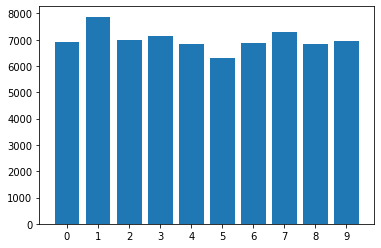

In [97]:
plt.bar(x = counts.index, height = counts.values)
plt.show()

## 배열 X에서 첫번째 이미지를 선택해서 시각화.

In [98]:
image_0 = X[0].reshape((28,28)) # (784,) 모양의 1d-array를 (28,28) 모양의 2d-array로 변환

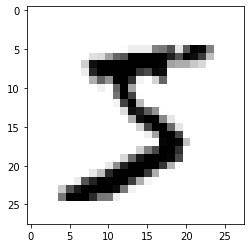

In [99]:
plt.imshow(image_0, cmap=plt.cm.binary) # 흑백 이미지를 부를 때, cmap을 해줘야 함
plt.show()

## 배열 X에 저장된 이미지 데이터 중에서 첫 100개의 이미지를 10x10 subplot에 시각화

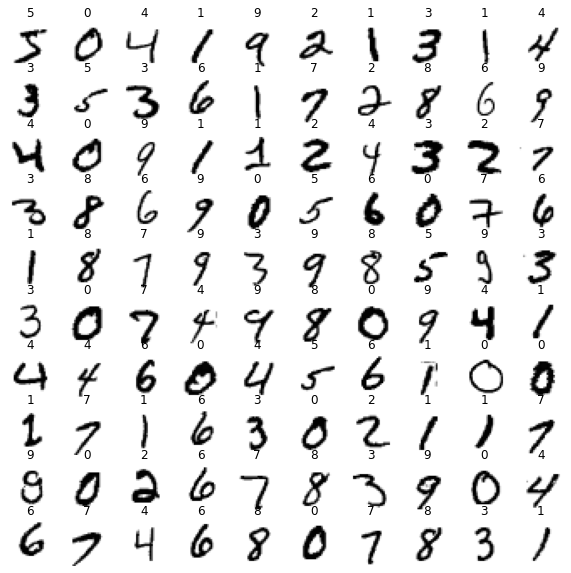

In [100]:
fig, ax = plt.subplots(10,10, figsize = (10,10))
for i in range(10):
    for j in range(10):
        images = X[i * 10 + j].reshape((28,28))
        label = y[i*10 + j]
        ax[i, j].imshow(images, cmap=plt.cm.binary)
        ax[i, j].axis('off')
        ax[i, j].set_title(label)
plt.show()

# 훈련(훈련Train/검증Validation)/ 테스트(Test) set 분리

* 과대적합, 과소적합을 검증하기 위해서 훈련셋을 훈련/ 검증셋으로 분리

* 훈련셋(Train set) : ML 모델을 훈련(학습)
* 검증셋(Validation set) : 훈련된 ML 모델의 일반화 성능을 테스트 하기 위한 셋. 하이퍼 파라미터들을 튜닝.
* 테스트셋(Test set) : 최종적으로 선택된 ML 모델의 일반화 성능을 예상하기 위해서 사용하는 셋.
    * 전체 머신러닝 과정에서 오직 **한 번만** 사용되어야 함

In [103]:
# 70,000개의 전체 데이터를 훈련 셋 60,000개와 테스트 셋 10,000개로 분리
X_tr_big, X_te = X[:60_000], X[60_000:] # 파이썬에서는 1000 단위를 _로 구분하여 사용 가능
y_tr_big, y_te = y[:60_000], y[60_000:] # 파이썬에서는 1000 단위를 _로 구분하여 사용 가능

In [105]:
X_tr_big.shape, y_tr_big.shape

((60000, 784), (60000,))

In [106]:
# 60,000개의 훈련 데이터를 54,000(훈련셋)개, 6,000(검증셋)개로 나눔
X_tr, X_val = X_tr_big[:54_000], X_tr_big[54000:]
y_tr, y_val = y_tr_big[:54_000], y_tr_big[54000:]

In [108]:
X_tr.shape, y_tr.shape

((54000, 784), (54000,))

* `train_test_split()` 함수를 사용해서 훈렴/ 검증/ 테스트 셋 분리
* MNIST 데이터 셋은 랜덤하게 섞여있기 때문에 순차추출을 사용할 수도 있음

KNN 모델 선택, 훈련, 평가

In [110]:
knn = KNeighborsClassifier(n_jobs=-1) # ML 모델 생성
# n_jobs = 동시 병렬 작업 수. CPU가 갖고 있는 성능을 얼만큼 사용할건지? -1 = 성능 최대로

In [111]:
knn.fit(X_tr, y_tr) # ML 모델 훈련

KNeighborsClassifier(n_jobs=-1)

In [112]:
knn.score(X_tr, y_tr)
# (1) predict(X_tr), (2) 예측값 == y_tr, (3) 정확도(accuracy)를 리턴.

0.9811481481481481

In [113]:
y_tr_pred = knn.predict(X_tr)

In [115]:
conf_mat = confusion_matrix(y_tr, y_tr_pred)

conf_mat

array([[5310,    3,    2,    0,    1,    4,   13,    1,    1,    1],
       [   1, 6092,    6,    0,    0,    0,    1,   10,    1,    1],
       [  24,   34, 5231,    6,    5,    3,    6,   42,    4,    3],
       [   4,   12,   24, 5379,    0,   31,    2,   20,   16,   16],
       [   3,   34,    1,    1, 5132,    0,    7,    4,    1,   64],
       [  12,    5,    3,   33,    6, 4758,   38,    2,    3,   12],
       [  14,    9,    0,    0,    4,   12, 5307,    0,    1,    0],
       [   1,   43,    7,    2,    8,    0,    0, 5506,    0,   30],
       [  14,   55,    9,   38,   18,   46,   13,   10, 5013,   38],
       [  12,    7,    5,   20,   29,    6,    1,   33,    6, 5254]])

## 틀린 예측값 분석

In [119]:
# 예측값과 실제값이 다른 샘플들
X_wrong = X_tr[y_tr != y_tr_pred]

X_wrong.shape

(1018, 784)

In [121]:
# 실제값과 예측값이 다른 레이블(실제값)들 
y_wrong = y_tr[y_tr != y_tr_pred]
y_wrong

['9', '2', '5', '2', '2', ..., '3', '5', '8', '8', '8']
Length: 1018
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [123]:
# 실제값과 예측값이 다른 예측값들 (잘못 예측된 값들)
wrong_pred = y_tr_pred[y_tr != y_tr_pred]
wrong_pred

array(['0', '7', '1', ..., '3', '3', '0'], dtype=object)

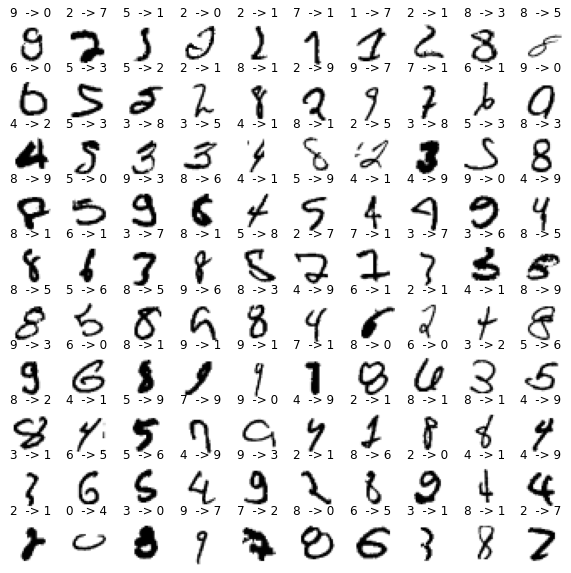

In [130]:
# 예측값이 틀린 샘플들 중 첫 100개를 시각화

fig, ax = plt.subplots(10,10, figsize = (10,10))
for i in range(10):
    for j in range(10):
        images = X_wrong[i * 10 + j].reshape((28,28))
        label = wrong_pred[i*10 + j]
        ax[i, j].imshow(images, cmap=plt.cm.binary)
        ax[i, j].axis('off')
        ax[i, j].set_title(f'{y_wrong[i*10+j]}  -> {label}')
plt.show()

### confusion matrix의 시각화

In [131]:
conf_mat

array([[5310,    3,    2,    0,    1,    4,   13,    1,    1,    1],
       [   1, 6092,    6,    0,    0,    0,    1,   10,    1,    1],
       [  24,   34, 5231,    6,    5,    3,    6,   42,    4,    3],
       [   4,   12,   24, 5379,    0,   31,    2,   20,   16,   16],
       [   3,   34,    1,    1, 5132,    0,    7,    4,    1,   64],
       [  12,    5,    3,   33,    6, 4758,   38,    2,    3,   12],
       [  14,    9,    0,    0,    4,   12, 5307,    0,    1,    0],
       [   1,   43,    7,    2,    8,    0,    0, 5506,    0,   30],
       [  14,   55,    9,   38,   18,   46,   13,   10, 5013,   38],
       [  12,    7,    5,   20,   29,    6,    1,   33,    6, 5254]])

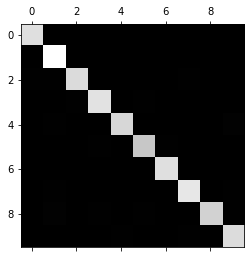

In [135]:
plt.matshow(conf_mat, cmap=plt.cm.gray)

#> cmap: 
    # 1) binary : 0(white) -> 숫자가 클 수록 black에 가까워짐
    # 2) gray : 0(balck) -> 숫자가 클 수록 white에 가까워짐

plt.show()

* 틀린 개수가 큰 부분은 밝게, 틀린 개수가 적은 부분은 어둡게 표현 
    => 예측이 정확한 부분은 분석 대상이 아니므로 0으로 대체

In [139]:
np.fill_diagonal(conf_mat, 0) # ( x 배열의 대각선 부분을, y 값으로 대체)

conf_mat

array([[ 0,  3,  2,  0,  1,  4, 13,  1,  1,  1],
       [ 1,  0,  6,  0,  0,  0,  1, 10,  1,  1],
       [24, 34,  0,  6,  5,  3,  6, 42,  4,  3],
       [ 4, 12, 24,  0,  0, 31,  2, 20, 16, 16],
       [ 3, 34,  1,  1,  0,  0,  7,  4,  1, 64],
       [12,  5,  3, 33,  6,  0, 38,  2,  3, 12],
       [14,  9,  0,  0,  4, 12,  0,  0,  1,  0],
       [ 1, 43,  7,  2,  8,  0,  0,  0,  0, 30],
       [14, 55,  9, 38, 18, 46, 13, 10,  0, 38],
       [12,  7,  5, 20, 29,  6,  1, 33,  6,  0]])

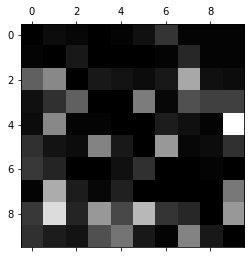

In [140]:
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()

## 과대 적합(overfitting) 여부 파악

In [142]:
y_val_pred = knn.predict(X_val) # 검증 셋 에서의 예측값을 찾음
y_val_pred

array(['5', '3', '5', ..., '5', '6', '8'], dtype=object)

In [144]:
y_val # 검증셋 실제값

['5', '3', '5', '0', '0', ..., '8', '3', '5', '6', '8']
Length: 6000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [146]:
np.mean(y_val == y_val_pred)

0.9758333333333333

-> 과대 적합의 크기다 작다. 일반화 성능이 나쁘지 않을 것으로 예상됨.

# Logistic Regression

In [150]:
logistic = LogisticRegression(random_state=42, n_jobs=-1) # ML 모델 생성


In [152]:
logistic.fit(X_tr, y_tr) # 학습(훈련)

LogisticRegression(n_jobs=-1, random_state=42)

In [154]:
y_tr_pred = logistic.predict(X_tr) # 훈련 셋 예측값

In [155]:
accuracy_score(y_tr, y_tr_pred) # 훈련 셋 정확도

0.9327592592592593

In [158]:
conf_mat = confusion_matrix(y_tr, y_tr_pred)
conf_mat

array([[5194,    0,   17,    8,   11,   30,   30,    6,   35,    5],
       [   1, 5966,   27,   19,    6,   14,    3,    9,   54,   13],
       [  26,   48, 4883,   83,   54,   17,   56,   48,  121,   22],
       [  17,   20,  112, 4993,    5,  146,   12,   48,  115,   36],
       [  12,   15,   25,    9, 4919,    8,   44,   14,   34,  167],
       [  48,   18,   37,  146,   45, 4306,   75,   14,  144,   39],
       [  30,    9,   37,    0,   33,   53, 5156,    5,   20,    4],
       [  11,   17,   48,   27,   33,    8,    4, 5260,   13,  176],
       [  24,   80,   52,  112,   18,  126,   40,   13, 4742,   47],
       [  20,   23,   11,   64,  102,   30,    3,  130,   40, 4950]])

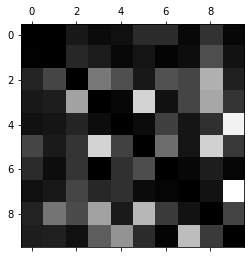

In [160]:
np.fill_diagonal(conf_mat, 0) # ( x 배열의 대각선 부분을, y 값으로 대체)

plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()

In [161]:
y_val_pred = knn.predict(X_val) # 검증 셋 에서의 예측값을 찾음
y_val_pred

array(['5', '3', '5', ..., '5', '6', '8'], dtype=object)

In [163]:
accuracy_score(y_tr, y_tr_pred) # 훈련 셋 정확도

0.9327592592592593

훈련셋과 검증셋 사이에서 과대적합이 없음.

## LogisticRegression의 원리

### Logistic 함수

$$
\phi y(z) = \dfrac{e^z}{e^z +1} = \dfrac{1}{1+e^{-z}}
$$

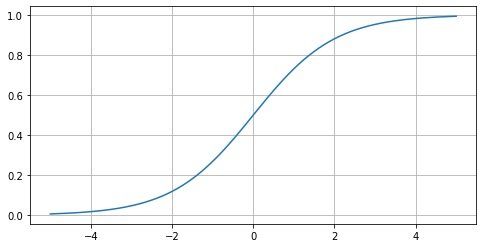

In [164]:
z = np.arange(-5,5,0.0001)

sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize= (8,4))
plt.plot(z, sigmoid)
plt.grid()
plt.show()

### 선형회귀

$$
z = w_0 + \sum_{i=1}^{n}{w_i \times x_i}
$$

훈련 셋의 특성들로 선형회귀식을 찾아서, logistic 함수에 전달해서 계산된 리턴 값은 클래스에 속할 확률로 해석할 수 있다.

Logistic Regeression은 선형 회귀를 이용해서 클래스에 속할 확률을 계산하고 분류를 하는 분류 알고리즘

In [167]:
logistic.coef_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [168]:
logistic.coef_.shape

(10, 784)

In [169]:
logistic.intercept_

array([-6.84955436e-05,  5.41502399e-05,  5.16628262e-05, -7.03985398e-05,
        8.20520981e-06,  3.70634742e-04, -2.49898964e-05,  1.27079776e-04,
       -3.66674197e-04, -8.11746174e-05])

In [171]:
probs = logistic.predict_proba(X[:5])
probs # (5,10) shape의 2d-array

array([[3.77050421e-05, 9.88513788e-09, 2.26469974e-04, 2.56443017e-01,
        3.05325070e-08, 7.43198417e-01, 1.99796753e-07, 5.61172539e-06,
        5.86530790e-05, 2.98857238e-05],
       [9.99993465e-01, 1.58569816e-13, 5.06406613e-07, 2.68173635e-07,
        1.66967374e-09, 3.97873430e-06, 3.30559756e-08, 2.10897613e-08,
        1.01717357e-06, 7.08860500e-07],
       [3.90222222e-05, 1.14058942e-06, 8.82430714e-02, 2.30426898e-01,
        6.71168759e-01, 3.80167752e-06, 8.71157327e-04, 2.76567469e-03,
        2.45886206e-03, 4.02161311e-03],
       [1.26626485e-06, 9.80542829e-01, 1.16816835e-02, 8.00562747e-04,
        1.33448311e-05, 6.50488804e-06, 3.14560919e-06, 2.60679612e-06,
        6.92167618e-03, 2.63799996e-05],
       [7.57363707e-08, 8.83254344e-06, 1.19311933e-07, 3.54724834e-06,
        3.00765449e-02, 4.47896183e-05, 5.72230768e-07, 6.30270102e-03,
        1.13999310e-03, 9.62422824e-01]])

In [172]:
y_tr_pred

array(['5', '0', '4', ..., '3', '9', '0'], dtype=object)